
## **Business Requirement:**

### CASE STUDY
The project is to help a company which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee;
-Satisfaction Level
-Last evaluation
-Number of projects
-Average monthly hours
-Time spent at the company
-Whether they have had a work accident
-Whether they have had a promotion in the last 5 years
-Departments (column sales)
-Salary

Use your analytics skills to answer the following questions :
1. What type of employees are leaving?
2. Which employees are prone to leave next.
3. Recommendations

##**BackGround**##
Employee attrition is a critical challenge faced by organizations across industries. It refers to the phenomenon of employees voluntarily leaving their jobs, which can have adverse effects on a company's productivity, profitability, and overall success. To address this issue, organizations can leverage the power of Exploratory Data Analysis (EDA) and Machine Learning (ML) techniques. By applying EDA and ML to employee data, organizations can gain valuable insights and develop effective strategies to control attrition.
EDA involves analyzing and visualizing data to uncover patterns, relationships, and trends. When applied to employee attrition, EDA can help organizations understand the underlying factors that contribute to attrition. Here's how EDA can be utilized:

a. Data Exploration: Perform an initial exploration of the employee dataset, examining variables such as demographics, job-related factors, performance metrics, and employee satisfaction. Identify missing values, outliers, and data inconsistencies.

b. Data Visualization: Utilize various visualization techniques such as histograms, bar plots, box plots, scatter plots, and correlation matrices to gain insights into the relationships between different variables. Visualize attrition rates across different employee groups, departments, or job levels to identify potential patterns or disparities.

c. Feature Importance: Employ techniques like feature importance or correlation analysis to determine the most influential factors related to attrition. Identify key drivers such as job satisfaction, work-life balance, salary, career growth opportunities, and employee engagement.

##Machine Learning Models for Attrition Control:##
Machine Learning can provide predictive and prescriptive capabilities to proactively manage employee attrition. Here are some ML techniques that can be applied:

a. Classification Models: Train classification models such as Logistic Regression, Random Forest, Support Vector Machines (SVM), or Gradient Boosting to predict the likelihood of employee attrition. Use historical data on employee attributes, performance, and attrition status as input features to build the models. These models can identify employees at high risk of attrition, enabling proactive intervention and retention strategies.

b. Feature Selection: Utilize feature selection techniques such as Recursive Feature Elimination (RFE) or SelectKBest to identify the most relevant predictors of attrition. This helps in reducing dimensionality and focusing on the most significant factors.

c. Model Evaluation: Assess the performance of the ML models using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC curves. Fine-tune the models using techniques like cross-validation.

In conclusion, employee attrition control is a critical concern for organizations seeking to maintain a stable and engaged workforce. By leveraging EDA techniques, organizations can gain a comprehensive understanding of the factors influencing attrition. Machine Learning models provide predictive capabilities that can identify employees at risk of leaving, enabling proactive retention strategies. Combining EDA and ML empowers organizations to develop effective attrition control strategies, improve employee satisfaction, and foster a positive work environment.

**Data Source:** This is a data provided by an anonymous company. The name of the organisation is witheld to prevent Data protection issues as stated in Most country's Data Protection regulations e.g GDPR for UK and NDPB (The Nigerian Data Protection Bureau) e.t.c.




In [ ]:
from google.colab import drive # The code reading the folder containing all the images in the zip folders on google drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



##**Exploratory Data Analytics for Employee Attrition Project**##

In this session, we will dive into the data and calculate or visualise each feature and draw an insight of why the agents are leaving the business or choose to remain in the business.

In [ ]:
employee = pd.read_excel('/content/gdrive/MyDrive/EmployeeAttrition.xlsx') #Read the datasets from the google drive
employee.head(2)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_Status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,Existing
1,2002,0.82,0.67,2,202,3,0,0,sales,low,Existing


In [ ]:
if employee.isnull().values.any():
    print("Null data exists in the 'employee' variable.")
else:
    print("No null data found in the 'employee' variable.")

No null data found in the 'employee' variable.


In [ ]:
employee.dtypes #Showing the data types.

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
Employee_Status           object
dtype: object

In [ ]:
employee['Emp ID'].count() # count of the total rows in the datasest.

14999

In [ ]:
employee.isnull().sum() # To check the null values. It shows there are no null values in the datasets.

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
Employee_Status          0
dtype: int64

In [ ]:
employee[employee.duplicated()] #Checking for duplicate. It shows there is no duplicate in the dataset

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_Status


In [ ]:
employee.columns #Showing the columns on the datasets

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Employee_Status'],
      dtype='object')

In [ ]:
employee.describe() # Describe the numerical columns in the datasets.

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_Status
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,3.344556,0.594706,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.829480,0.637183,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,3.000000,1.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,6.000000,1.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000,1.000000


In [ ]:
employee['Employee_Status'].unique() #Levels in Employee_Status

array(['Existing', 'Left'], dtype=object)

In [ ]:
employee['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'RandD', 'marketing'], dtype=object)

In [ ]:
employee.nunique() #Showing the unique count of each column.

Emp ID                   14999
satisfaction_level          92
last_evaluation             65
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
promotion_last_5years        2
dept                        10
salary                       3
Employee_Status              2
dtype: int64

Text(0, 0.5, 'Volume of Employee')

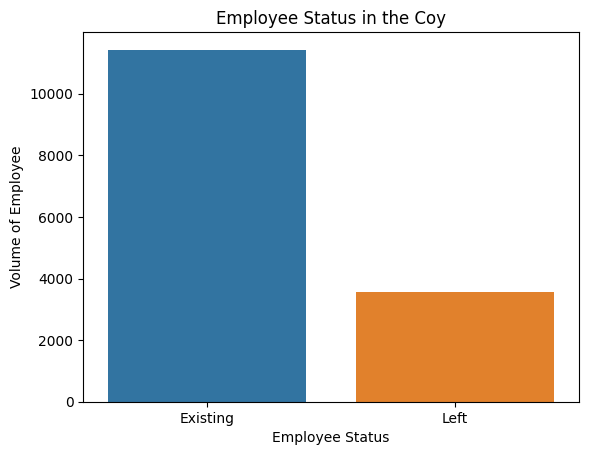

In [ ]:
# Showing the Distribution of Loan status with a bar chart

Groupby_Status = employee.groupby('Employee_Status')['Emp ID'].count().reset_index()

sns.barplot(x= 'Employee_Status', y = 'Emp ID', data=Groupby_Status)
plt.title('Employee Status in the Coy')
plt.xlabel('Employee Status')
plt.ylabel('Volume of Employee')

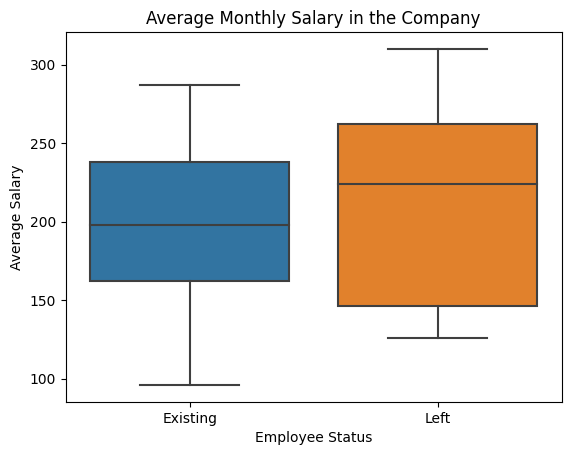

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='Employee_Status', y='average_montly_hours', data=employee)

# Set the title, x-label, and y-label
plt.title('Average Monthly Salary in the Company')
plt.xlabel('Employee Status')
plt.ylabel('Average Salary')

# Display the plot
plt.show()


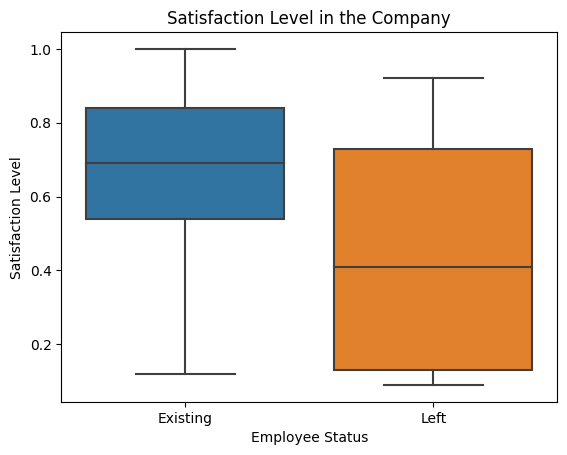

In [ ]:
# Create a box plot
sns.boxplot(x='Employee_Status', y='satisfaction_level', data=employee)

# Set the title, x-label, and y-label
plt.title('Satisfaction Level in the Company')
plt.xlabel('Employee Status')
plt.ylabel('Satisfaction Level')

# Display the plot
plt.show()

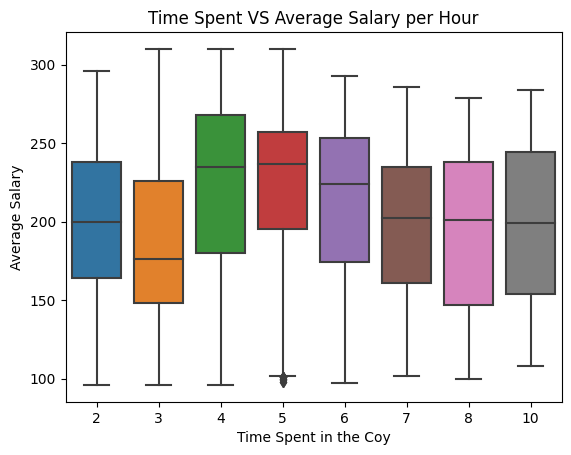

In [ ]:
# Create a box plot
sns.boxplot(x='time_spend_company', y='average_montly_hours', data=employee)

# Set the title, x-label, and y-label
plt.title('Time Spent VS Average Salary per Hour')
plt.xlabel('Time Spent in the Coy')
plt.ylabel('Average Salary')

# Display the plot
plt.show()

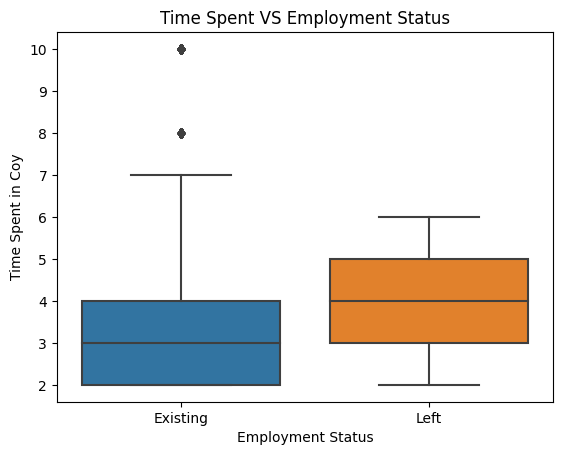

In [ ]:
# Create a box plot
sns.boxplot(x='Employee_Status', y='time_spend_company', data=employee)

# Set the title, x-label, and y-label
plt.title('Time Spent VS Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Time Spent in Coy')

# Display the plot
plt.show()

In [ ]:
Emp_WorkAccidents = employee[employee['Work_accident']==1]
Emp_WorkAccidents.count()

Emp ID                   2169
satisfaction_level       2169
last_evaluation          2169
number_project           2169
average_montly_hours     2169
time_spend_company       2169
Work_accident            2169
promotion_last_5years    2169
dept                     2169
salary                   2169
Employee_Status          2169
dtype: int64

Text(0, 0.5, 'Count Work Accidents')

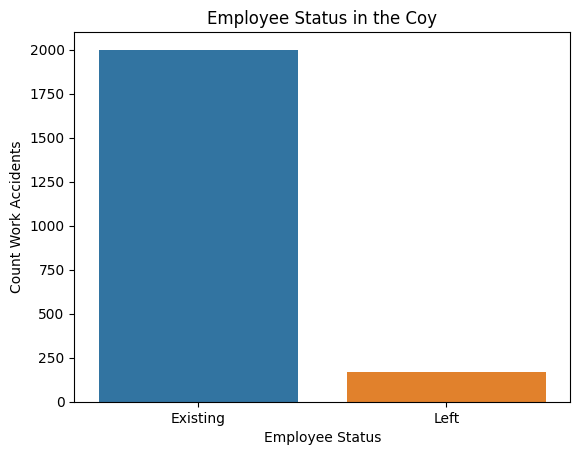

In [ ]:


Groupby_Accident = Emp_WorkAccidents.groupby('Employee_Status')['Work_accident'].count().reset_index()

sns.barplot(x= 'Employee_Status', y = 'Work_accident', data=Groupby_Accident)
plt.title('Employee Status in the Coy')
plt.xlabel('Employee Status')
plt.ylabel('Count Work Accidents')

In [ ]:
Groupby_Accident2 = employee.groupby('Work_accident')['Emp ID'].count().reset_index()
Groupby_Accident2['Perc_'] = (Groupby_Accident2['Emp ID']/Groupby_Accident2['Emp ID'].sum()).round(3)*100
Groupby_Accident2

,Work_accident,Emp ID,Perc_
0,0,12830,85.5
1,1,2169,14.5


In [ ]:
Groupby_Accident3 = employee.groupby(['Work_accident', 'Employee_Status'])['Emp ID'].count().reset_index()
Groupby_Accident3['Perc_'] = (Groupby_Accident3['Emp ID'] / Groupby_Accident3['Emp ID'].sum()).round(3) * 100
Groupby_Accident3


,Work_accident,Employee_Status,Emp ID,Perc_
0,0,Existing,9428,62.9
1,0,Left,3402,22.7
2,1,Existing,2000,13.3
3,1,Left,169,1.1


##Visualisation of Employee status and Work Accidents##

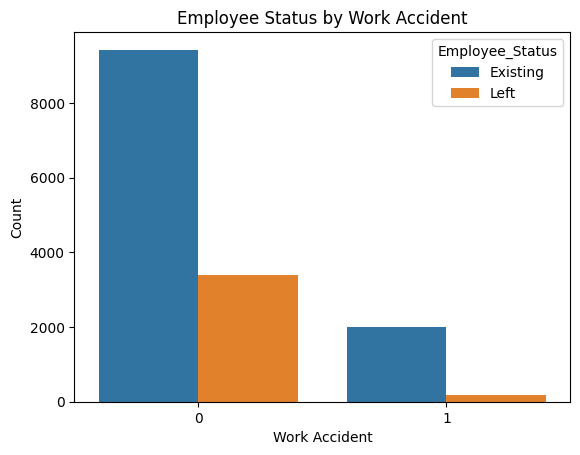

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot grouped bar chart
sns.barplot(x='Work_accident', y='Emp ID', hue='Employee_Status', data=Groupby_Accident3)

# Set title and labels
plt.title('Employee Status by Work Accident')
plt.xlabel('Work Accident')
plt.ylabel('Count')

# Show the plot
plt.show()



##Comments##

Employee with work accidents. There is no relationnship between those leaving the busines and their work accidents.

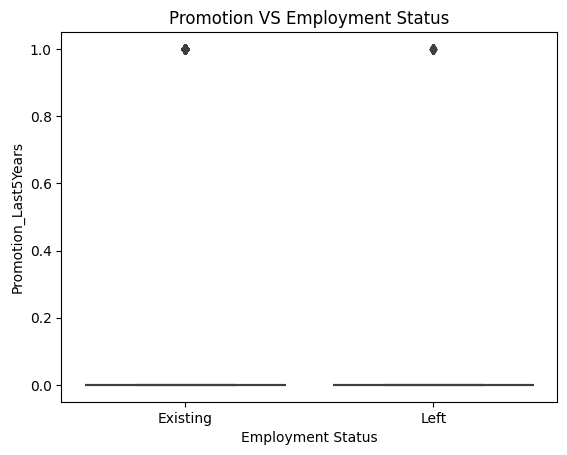

In [ ]:
sns.boxplot(x='Employee_Status', y='promotion_last_5years', data=employee)

# Set the title, x-label, and y-label
plt.title('Promotion VS Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Promotion_Last5Years')

# Display the plot
plt.show()

Text(0, 0.5, 'Count of Promotion')

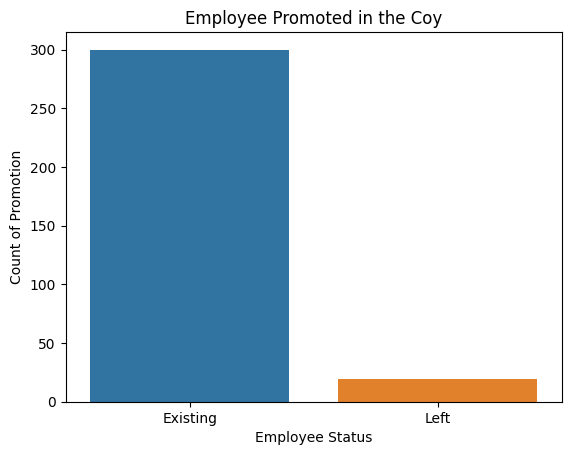

In [ ]:
employee_Promoted = employee[employee['promotion_last_5years'] == 1]

Groupby_Promoted = employee_Promoted.groupby('Employee_Status')['Work_accident'].count().reset_index()

sns.barplot(x= 'Employee_Status', y = 'Work_accident', data=Groupby_Promoted)
plt.title('Employee Promoted in the Coy')
plt.xlabel('Employee Status')
plt.ylabel('Count of Promotion')

In [ ]:
Groupby_Promotion1 = employee.groupby(['promotion_last_5years', 'Employee_Status'])['Emp ID'].count().reset_index()
Groupby_Promotion1['Perc_'] = (Groupby_Promotion1['Emp ID'] / Groupby_Promotion1['Emp ID'].sum()).round(3) * 100
Groupby_Promotion1

,promotion_last_5years,Employee_Status,Emp ID,Perc_
0,0,Existing,11128,74.2
1,0,Left,3552,23.7
2,1,Existing,300,2.0
3,1,Left,19,0.1


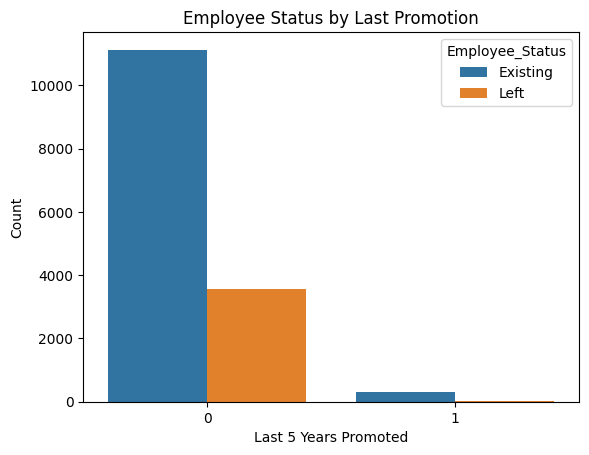

In [ ]:
# Plot grouped bar chart
sns.barplot(x='promotion_last_5years', y='Emp ID', hue='Employee_Status', data=Groupby_Promotion1)

# Set title and labels
plt.title('Employee Status by Last Promotion')
plt.xlabel('Last 5 Years Promoted')
plt.ylabel('Count')

# Show the plot
plt.show()

##Comments##

In the chart above, it shows that the conpaby is not in the habit of promoting their employee. Promotion is relatively small for those leaving the business.This is evidenced in the table above.

In [ ]:
Groupby_Dept = employee.groupby(['dept', 'Employee_Status'])['Emp ID'].count().reset_index()
Groupby_Dept['Perc_'] = (Groupby_Dept['Emp ID'] / Groupby_Dept['Emp ID'].sum()).round(3) * 100
Groupby_Dept

,dept,Employee_Status,Emp ID,Perc_
0,IT,Existing,954,6.4
1,IT,Left,273,1.8
2,RandD,Existing,666,4.4
3,RandD,Left,121,0.8
4,accounting,Existing,563,3.8
5,accounting,Left,204,1.4
6,hr,Existing,524,3.5
7,hr,Left,215,1.4
8,management,Existing,539,3.6
9,management,Left,91,0.6


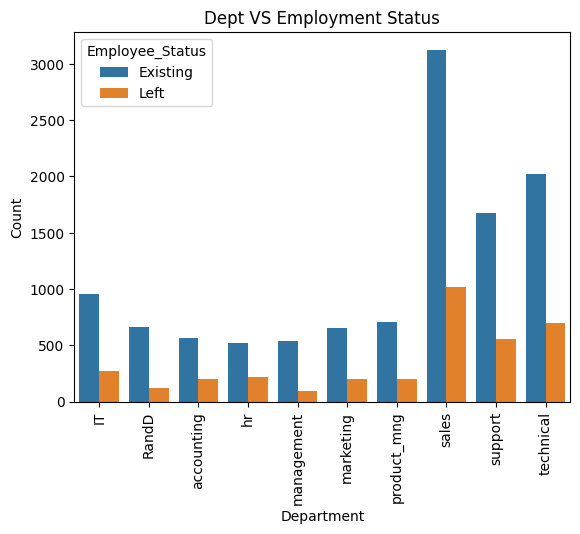

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot grouped bar chart
ax = sns.barplot(x='dept', y='Emp ID', hue='Employee_Status', data=Groupby_Dept)

# Set title and labels
plt.title('Dept VS Employment Status')
plt.xlabel('Department')
plt.ylabel('Count')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()


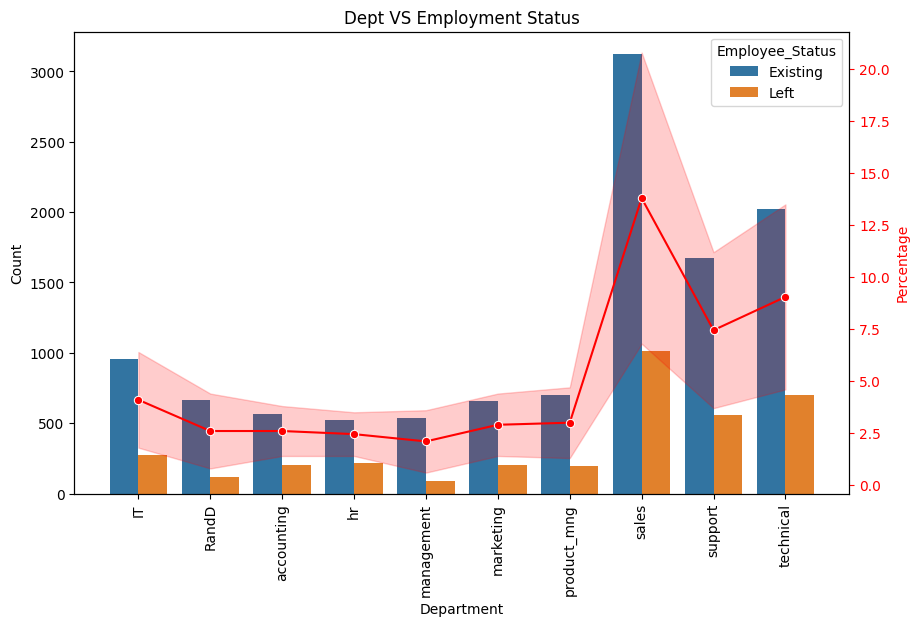

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='dept', y='Emp ID', hue='Employee_Status', data=Groupby_Dept)

# Set title and labels
plt.title('Dept VS Employment Status')
plt.xlabel('Department')
plt.ylabel('Count')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add trend line
ax2 = ax.twinx()
sns.lineplot(x='dept', y='Perc_', data=Groupby_Dept, color='red', marker='o', ax=ax2)

# Set percentage axis on the right side
ax2.set_ylabel('Percentage', color='red')
ax2.tick_params(axis='y', colors='red')

# Show the plot
plt.show()



##Comments##

More staff who left the business are in sales, support, technical and IT.

##Visualising the Number of Project and Employee Status##

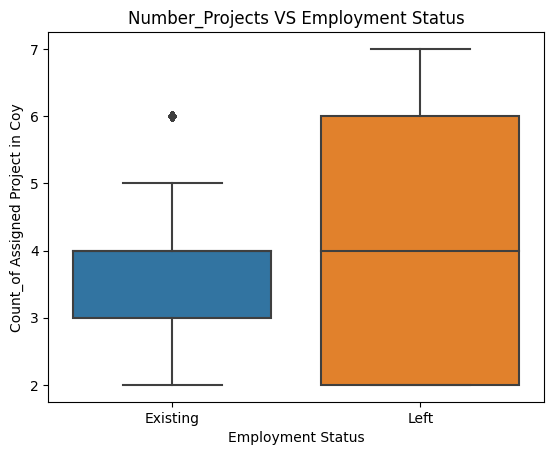

In [ ]:
sns.boxplot(x='Employee_Status', y='number_project', data=employee)

# Set the title, x-label, and y-label
plt.title('Number_Projects VS Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count_of Assigned Project in Coy')

# Display the plot
plt.show()

##Comments##

Based on the boxplot picture above, employee who had left the company have more projects than those who are currently in the complaing, the existing staff.

##Visualising ghr salary and Number of project Column##

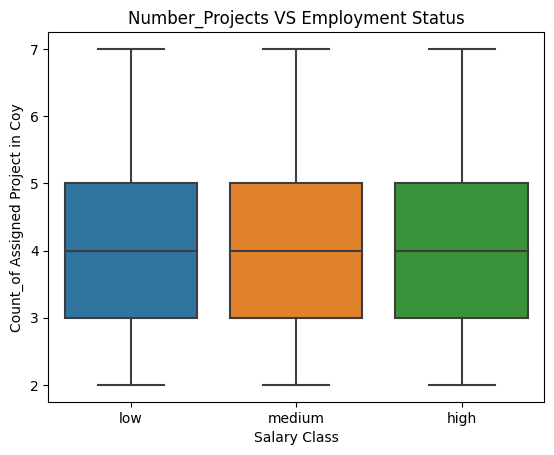

In [ ]:
sns.boxplot(x='salary', y= 'number_project', data=employee)

# Set the title, x-label, and y-label
plt.title('Number_Projects VS Employment Status')
plt.xlabel('Salary Class')
plt.ylabel('Count_of Assigned Project in Coy')

# Display the plot
plt.show()

##Comments##

There seems to be no different between the number of project assigned to each employee in different salary levels.

##Analysing the Salary Columns##

In [ ]:
GroupBySalary = employee.groupby('salary').agg({'Employee_Status': 'count',
                                                'number_project': 'sum',
                                                 }).reset_index() # Grouping the salary column by employment states and number of projects.
GroupBySalary

,salary,Employee_Status,number_project
0,high,1237,4660
1,low,7316,27800
2,medium,6446,24582


##**Binarising the Categorical Variables**##

In [ ]:
employee['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'RandD', 'marketing'], dtype=object)

##**Binarisation of all the Categorical Columns**##

The categorical columns need to be encoded with intergers. This is one of the preprocessing activities for machine learning. Most especially a non line regression classification. This process is achieved below:

In [ ]:

from sklearn.preprocessing import LabelEncoder

salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
employee['salary'] = employee['salary'].map(salary_mapping)

dept_mapping = {'sales': 0, 'accounting': 1, 'hr': 2, 'technical': 3, 'support':4, 'management':5,'IT':6,'product_mng':7,'RandD':8,'marketing':9}
employee['dept'] = employee['dept'].map(dept_mapping)

Employee_Status_mapping = {'Existing': 0, 'Left': 1}
employee['Employee_Status'] = employee['Employee_Status'].map(Employee_Status_mapping)



In [ ]:
employee['salary'].unique # The uniqueness of the salary column.

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
14994    0
14995    0
14996    0
14997    0
14998    0
Name: salary, Length: 14999, dtype: int64>

In [ ]:
employee.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                       int64
salary                     int64
Employee_Status            int64
dtype: object

##**Feature Selections**##

There are several technic of doing eature selection but i will only explore two. Feature selection is a technic used to select the best variable or feature useful for machine learning and that will give the best prediction. In this instance, it is the feature that gives the best prediction on the who is likely to leave or not leave at the time of employee onboarding using the aailable data.
##HeatMap- Correlations##

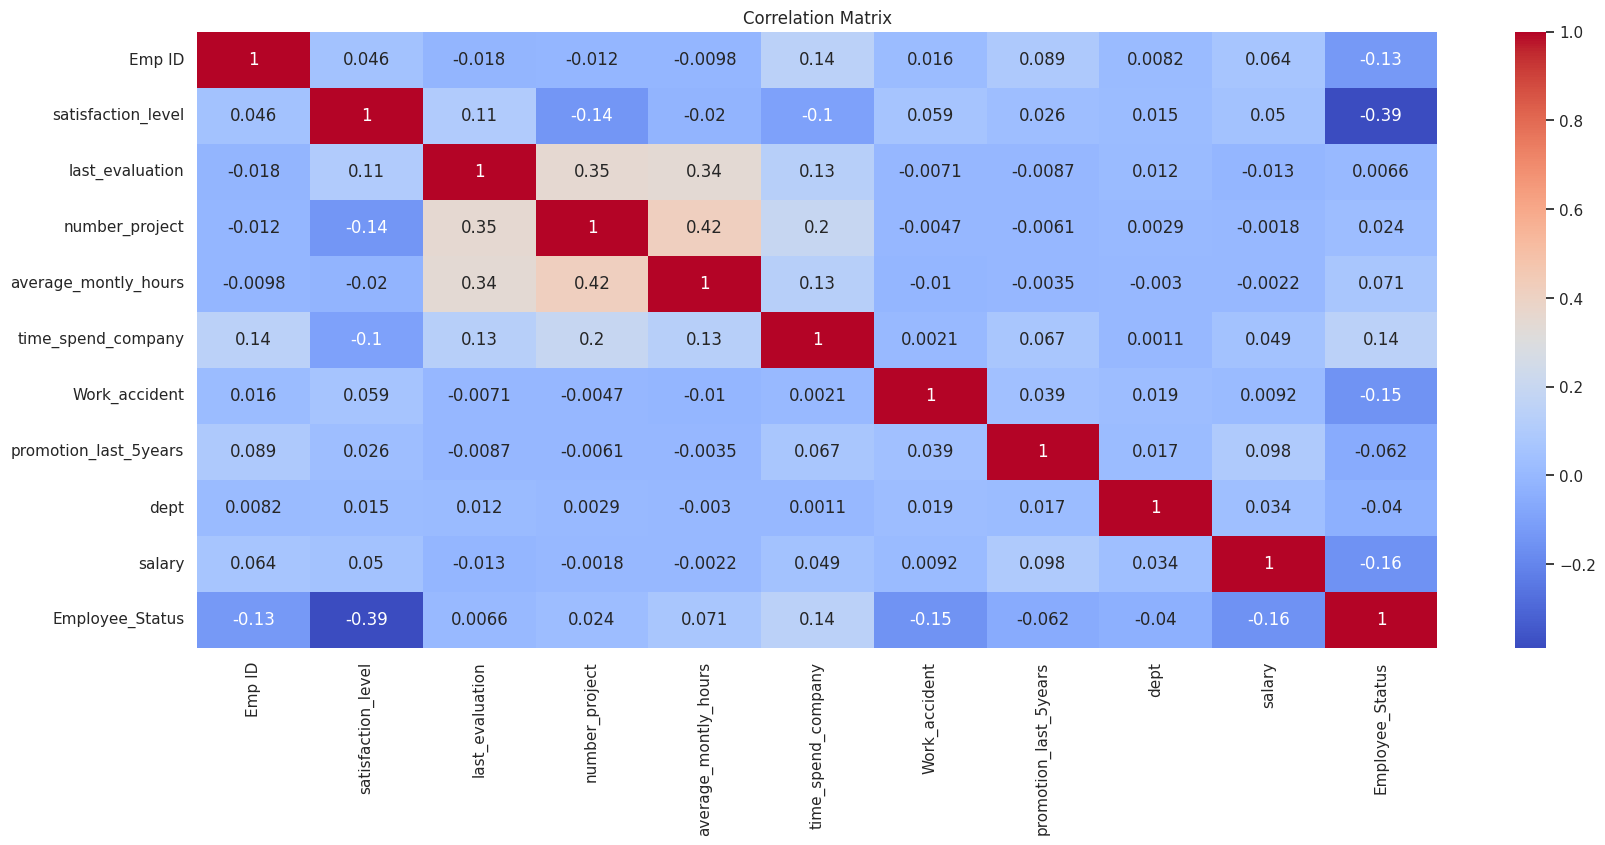

In [ ]:
# Calculate correlation matrix

#employee = employee.drop('Emp ID', axis = 1)
correlation_matrix = employee.corr()

# Plot heatmap
sns.set(rc={'figure.figsize':(20,8)})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

##Xtra Tree Classifiers Techinc##

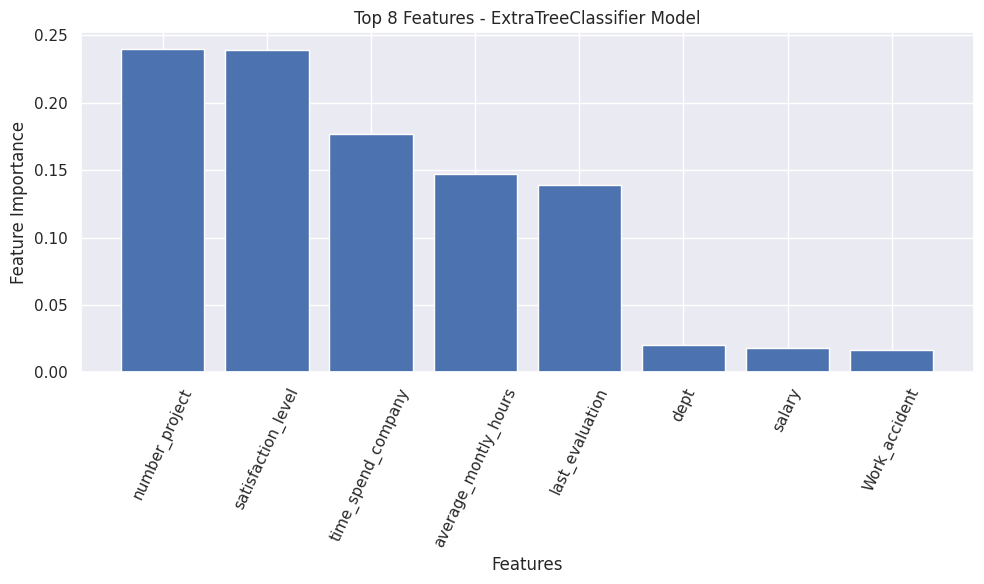

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

Features = employee.drop(['Emp ID', 'Employee_Status'], axis = 1)
Class = employee['Employee_Status']

# Feature selection with ExtraTreeClassifier
model = ExtraTreesClassifier()
model.fit(Features, Class)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top 10 features
k = 8  # Number of best features to select
selected_indices = indices[:k]
selected_features = Features.columns[selected_indices]
selected_importances = importances[selected_indices]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(selected_features, selected_importances)
plt.xticks(rotation=65)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Top 8 Features - ExtraTreeClassifier Model")
plt.tight_layout()
plt.show()

##Comments##

Based on the outcome of the two tchnic used for feature selection, it appears that all the variables are important. However, satifaction level, number of project, time_spend_company, last_evaluation, average_monthly_hours features are major contributors to employee employment status. I mean contributor to their leaving or staying in the company.
I shall however, use all the variable to fit all the classifier that will be used in this solution.

##Conclusions##

Based on the different stages of EDA above, it can be concluded that the major reasons the employee are leaving the company is more of their level of job satisfactions, number of projects and their hourly pay. The most important feature is the job satisfaction. The business is therefore required to take the employee job satisfaction very seriosuly to reduce the attrition rate in furture.

##**Machine Learning**##

##Support Vector Machine Model##

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Instantiate an SVM classifier
svm = SVC()

# Perform 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the evaluation metrics
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in skf.split(Features, Class):
    X_train, X_test = Features.iloc[train_index], Features.iloc[test_index]
    y_train, y_test = Class.iloc[train_index], Class.iloc[test_index]

    # Fit the SVM classifier on the training data
    svm.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = svm.predict(X_test)

    # Calculate the evaluation metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the metrics to the lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate the average metrics
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print the average metrics
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-score:", avg_f1)


Average Precision: 0.8276714494485677
Average Recall: 0.7842523507835946
Average F1-score: 0.7087753690580546


##Comments##

The model metrics a fairly good result but it can be better. It shows that the quality fo our prediction on both true positive and true negative is about 70%. There is high chances that the model is doing wrong predictions based on the outcome of the model. Another level of analysis on the model prediction is given below:

##Confusion Matrix for SVM##

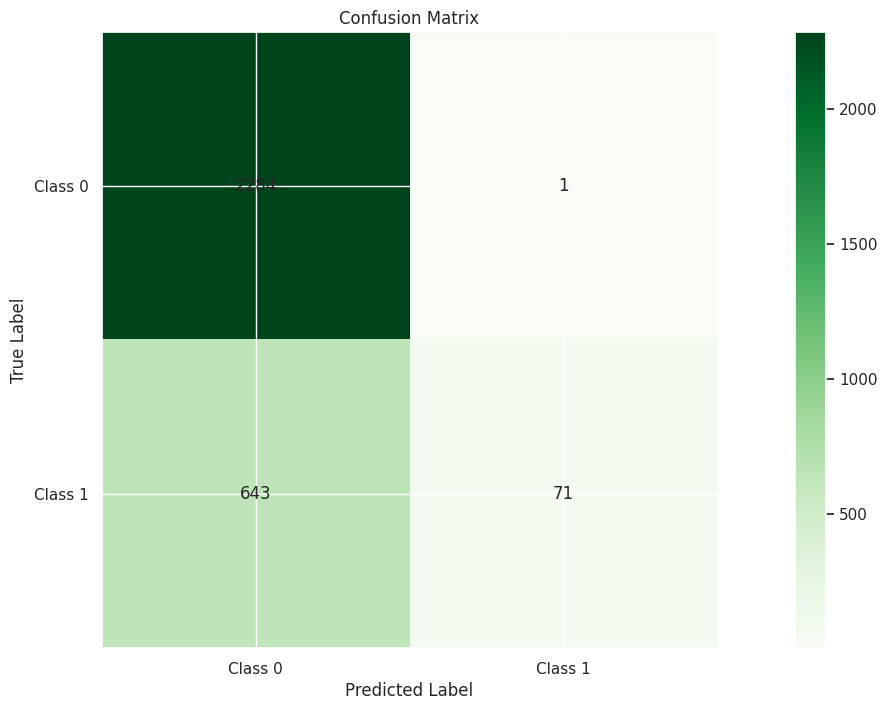

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(conf_mat, cmap='Greens', interpolation='None')
plt.colorbar()

plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.annotate(str(conf_mat[i][j]), xy=(j, i), ha='center', va='center')

plt.show()

##Area under the Curve for SVM##

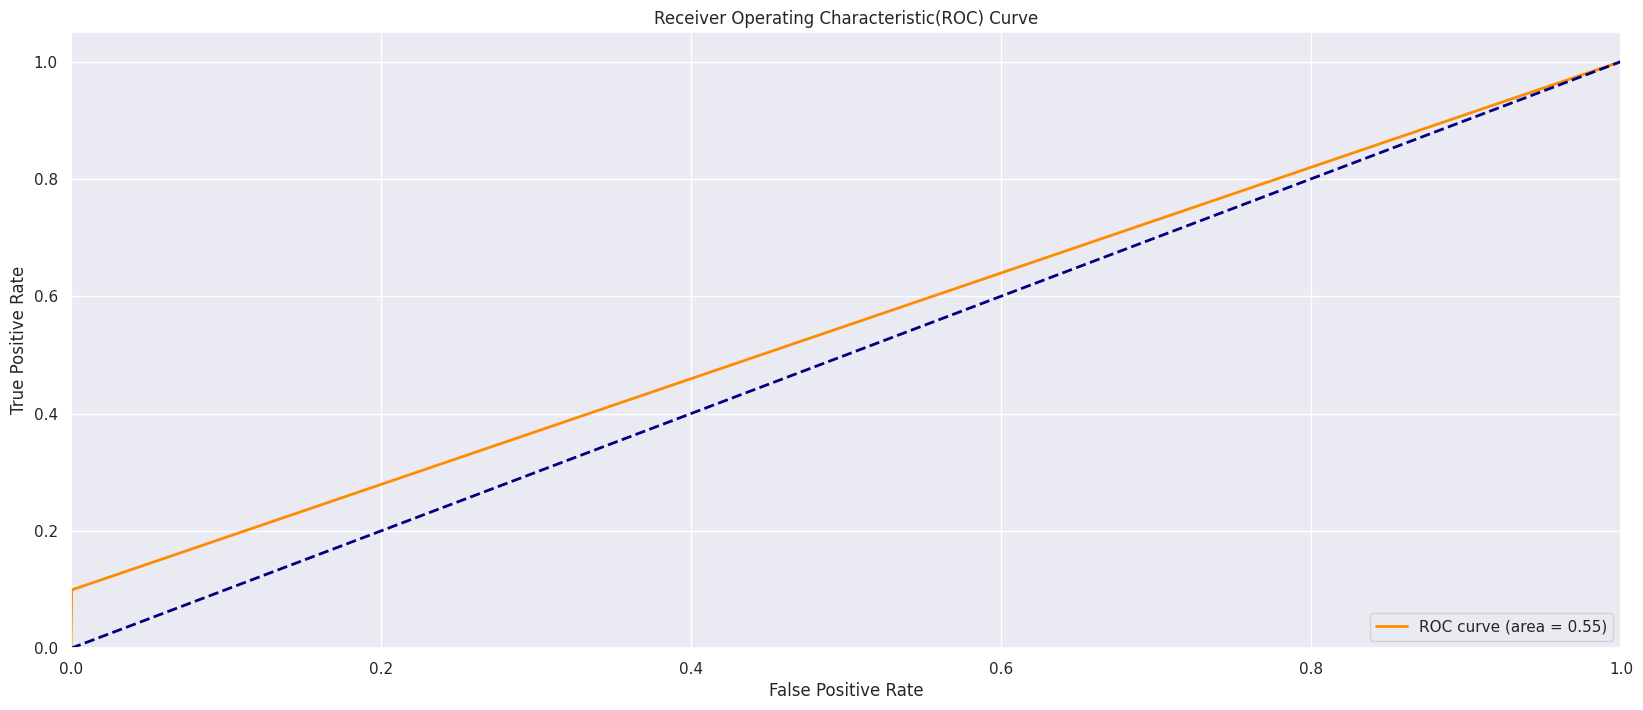

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##Random Forest Model##

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Instantiate a Random Forest classifier
rf = RandomForestClassifier()

# Perform 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the evaluation metrics
precisions1 = []
recalls1 = []
f1_scores1 = []

for train_index, test_index in skf.split(Features, Class):
    X_train, X_test = Features.iloc[train_index], Features.iloc[test_index]
    y_train, y_test = Class.iloc[train_index], Class.iloc[test_index]

    # Fit the Random Forest classifier on the training data
    rf.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred1 = rf.predict(X_test)

    # Calculate the evaluation metrics
    precision1 = precision_score(y_test, y_pred1, average='weighted')
    recall1 = recall_score(y_test, y_pred1, average='weighted')
    f11 = f1_score(y_test, y_pred1, average='weighted')

    # Append the metrics to the lists
    precisions1.append(precision1)
    recalls1.append(recall1)
    f1_scores1.append(f11)

# Calculate the average metrics
avg_precision1 = sum(precisions1) / len(precisions1)
avg_recall1 = sum(recalls1) / len(recalls1)
avg_f11 = sum(f1_scores1) / len(f1_scores1)

# Print the average metrics
print("Average Precision:", avg_precision1)
print("Average Recall:", avg_recall1)
print("Average F1-score:", avg_f11)


Average Precision: 0.9926910246534973
Average Recall: 0.9926661109258642
Average F1-score: 0.9926359077331719


##Comments##

It appears that the Random forest model is better than the other because of the higher model metrics. Over 90% accuracy level, recall and precisions are good prediction level.

##Confusion Matrix for Random Forest##

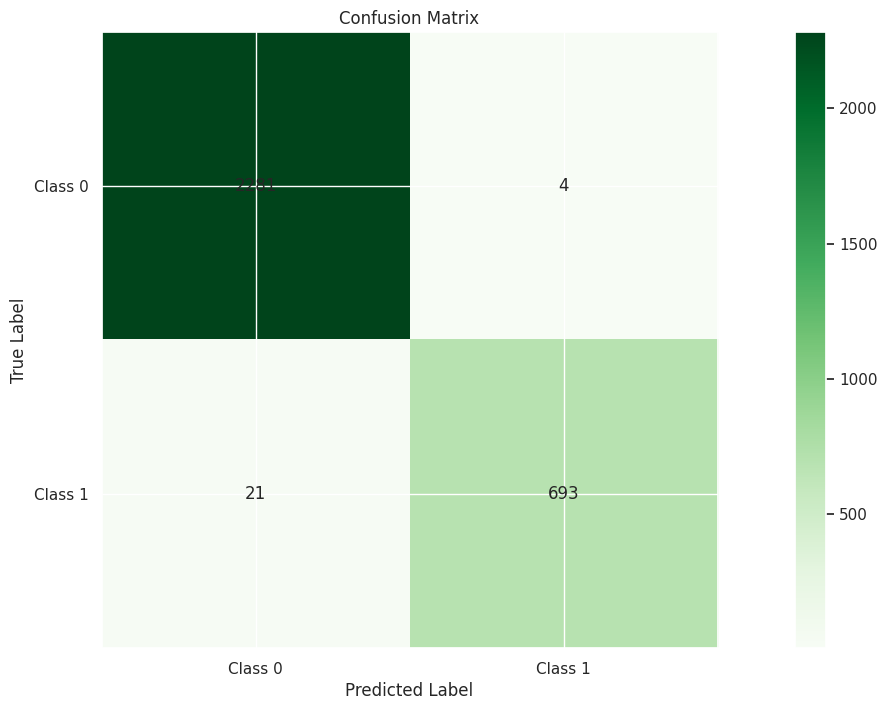

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_mat1 = confusion_matrix(y_test, y_pred1)

# Plot the confusion matrix
plt.imshow(conf_mat1, cmap='Greens', interpolation='None')
plt.colorbar()

plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(conf_mat1.shape[0]):
    for j in range(conf_mat1.shape[1]):
        plt.annotate(str(conf_mat1[i][j]), xy=(j, i), ha='center', va='center')

plt.show()

##Comments##

From the matrix above, it model is only making only 21 wrong predictions for false negative and 7 wrong prediction for false positive out of 2999 overall test cases.

##Area under the Curve for Randon Forest##

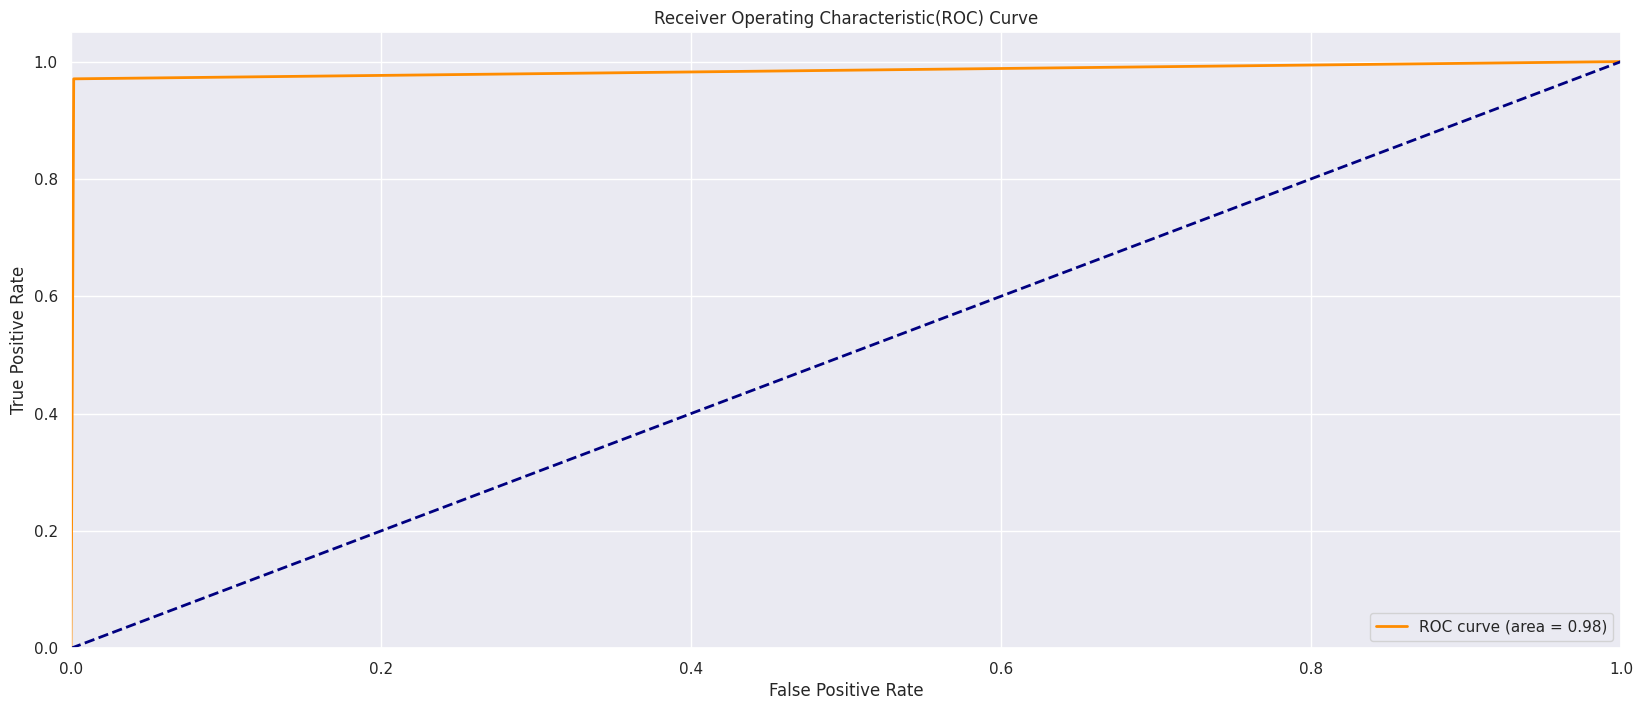

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##Comments##

The AUC curve above shows a very high predictive power to the random forest at 98%. The model can only make 2% error rate.

##Logistics Regression Model##

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.exceptions import ConvergenceWarning

import warnings

# Set seed for reproducibility
seed = 42

# Instantiate a Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000, random_state=seed)

# Perform 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Lists to store the evaluation metrics
precisions2 = []
recalls2 = []
f1_scores2 = []

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

for train_index, test_index in skf.split(Features, Class):
    X_train, X_test = Features.iloc[train_index], Features.iloc[test_index]
    y_train, y_test = Class.iloc[train_index], Class.iloc[test_index]

    # Fit the Logistic Regression classifier on the training data
    logreg.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred2 = logreg.predict(X_test)

    # Calculate the evaluation metrics
    precision2 = precision_score(y_test, y_pred2, average='weighted')
    recall2 = recall_score(y_test, y_pred2, average='weighted')
    f12 = f1_score(y_test, y_pred2, average='weighted')

    # Append the metrics to the lists
    precisions2.append(precision2)
    recalls2.append(recall2)
    f1_scores2.append(f12)

# Calculate the average metrics
avg_precision2 = sum(precisions2) / len(precisions2)
avg_recall2 = sum(recalls2) / len(recalls2)
avg_f12 = sum(f1_scores2) / len(f1_scores2)

# Print the average metrics
print("Average Precision:", avg_precision2)
print("Average Recall:", avg_recall2)
print("Average F1-score:", avg_f12)


Average Precision: 0.7682026312581117
Average Recall: 0.7899196176503278
Average F1-score: 0.7686528539267188


##Confusion Matrix for Logistics Regression##

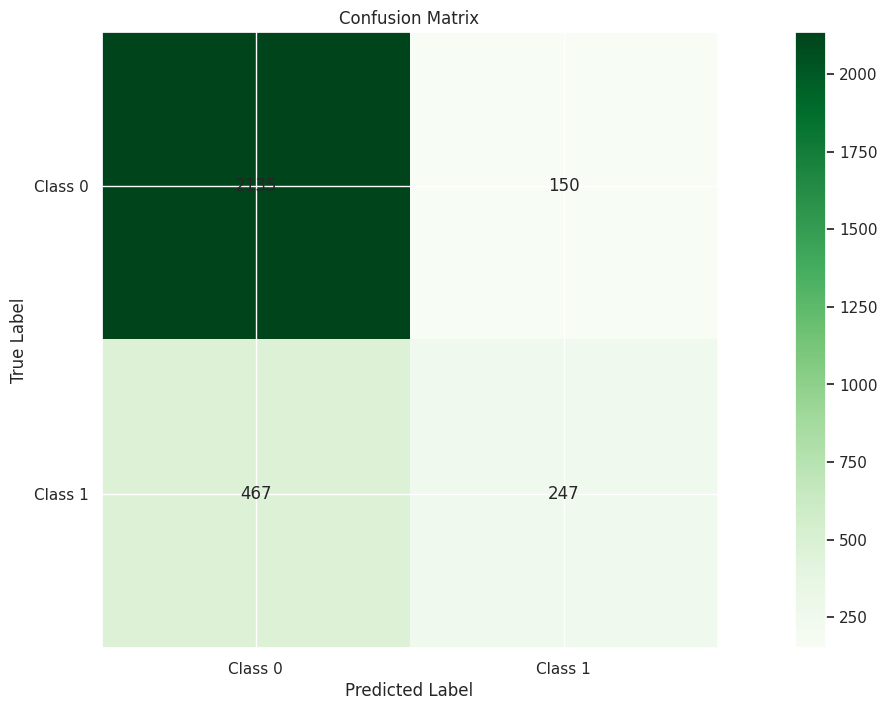

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_mat2 = confusion_matrix(y_test, y_pred2)

# Plot the confusion matrix
plt.imshow(conf_mat2, cmap='Greens', interpolation='None')
plt.colorbar()

plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(conf_mat2.shape[0]):
    for j in range(conf_mat2.shape[1]):
        plt.annotate(str(conf_mat2[i][j]), xy=(j, i), ha='center', va='center')

plt.show()

##Area under the curve for Logistic Regression##

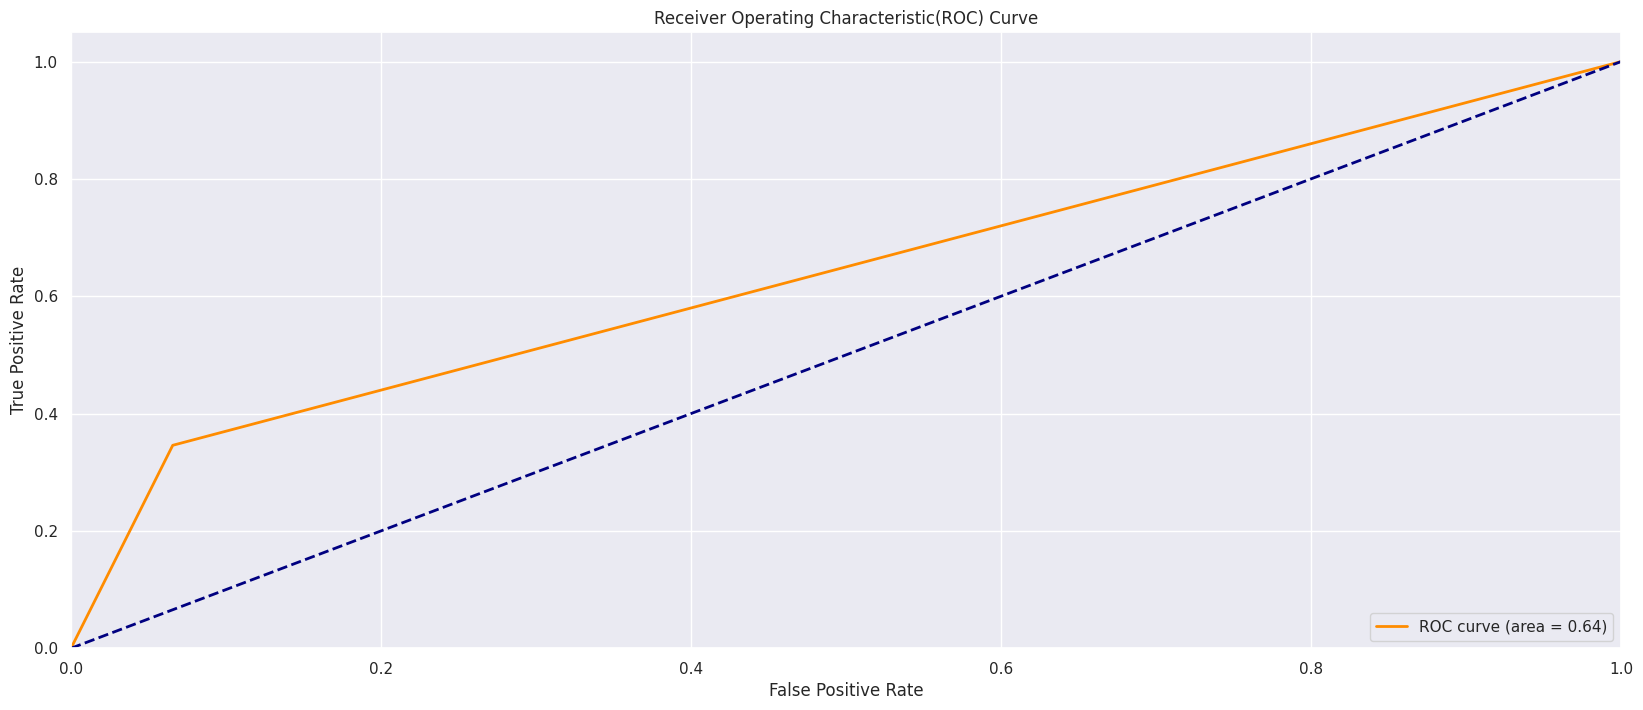

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##Comments##

The Logistic regresssion model is not better. It has a lower model metrics compared to random Forest. It make more error in confusion matric and the AUC is around 64% overall .

##Validating The best Model##

The 200 set of  validation data will be randomely selected from the existing data used for training and testing the model because there is no access to new data to validate the performance of the model.



In [ ]:
import pandas as pd

# Randomly select 200 rows from the "employee" variable
Validation_employee = employee.sample(n=200, random_state=42)

# Display the randomly selected rows
Validation_employee.nunique()

Emp ID                   200
satisfaction_level        75
last_evaluation           57
number_project             6
average_montly_hours     117
time_spend_company         8
Work_accident              2
promotion_last_5years      2
dept                      10
salary                     3
Employee_Status            2
dtype: int64

In [ ]:
Validation_employee.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                       int64
salary                     int64
Employee_Status            int64
dtype: object

##Extract the Features and Targets##

In this session, the features and the target are extracted from the validation data and tested on the best model to obtain its metrics. This gives an idea how fit the model is in predicting the employee likely to stay or leave the company at the point of onboarding.

In [ ]:
Features1 = Validation_employee.drop(['Emp ID', 'Employee_Status'], axis = 1)
Class1 = Validation_employee['Employee_Status']

In [ ]:
# Lists to store the evaluation metrics
precisionsval = []
recallsval = []
f1_scoresval = []

y_predval = rf.predict(Features1)

# Calculate the evaluation metrics
precisionval = precision_score(Class1, y_predval, average='weighted')
recallval = recall_score(Class1, y_predval, average='weighted')
f1val = f1_score(Class1, y_predval, average='weighted')

# Append the metrics to the lists
precisionsval.append(precisionval)
recallsval.append(recallval)
f1_scoresval.append(f1val)

# Calculate the average metrics
avg_precisionval = sum(precisionsval) / len(precisionsval)
avg_recallval = sum(recallsval) / len(recallsval)
avg_f1val = sum(f1_scoresval) / len(f1_scoresval)

# Print the average metrics
print("Average Precision:", avg_precisionval)
print("Average Recall:", avg_recallval)
print("Average F1-score:", avg_f1val)



Average Precision: 0.9950342465753423
Average Recall: 0.995
Average F1-score: 0.9949856552854754


##Confusion Matrix##

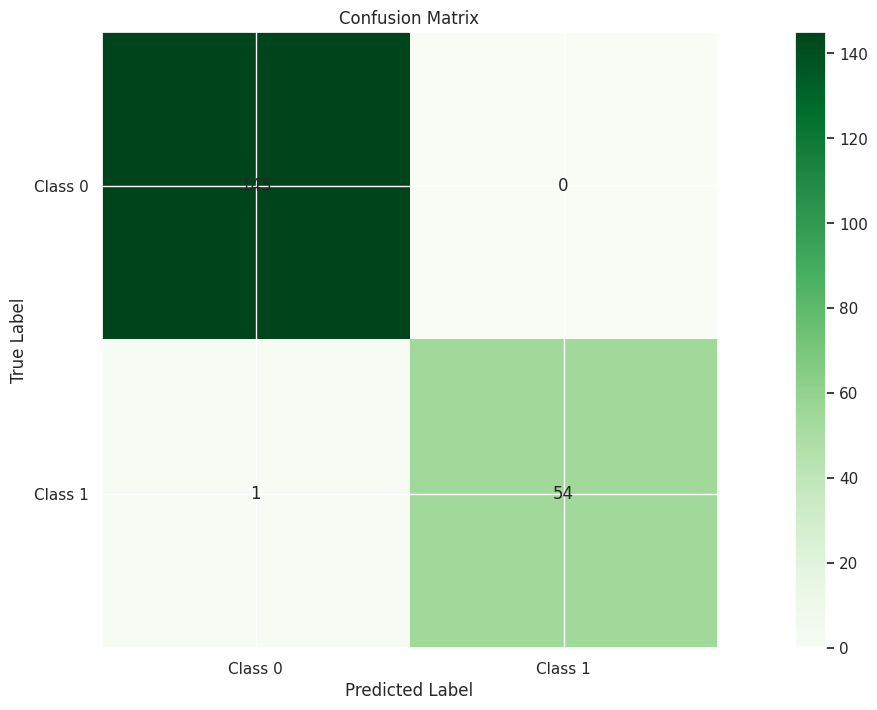

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matval = confusion_matrix(Class1,y_predval )

# Plot the confusion matrix
plt.imshow(conf_matval, cmap='Greens', interpolation='None')
plt.colorbar()

plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(conf_matval.shape[0]):
    for j in range(conf_matval.shape[1]):
        plt.annotate(str(conf_matval[i][j]), xy=(j, i), ha='center', va='center')

plt.show()

##Area Under the Curve##

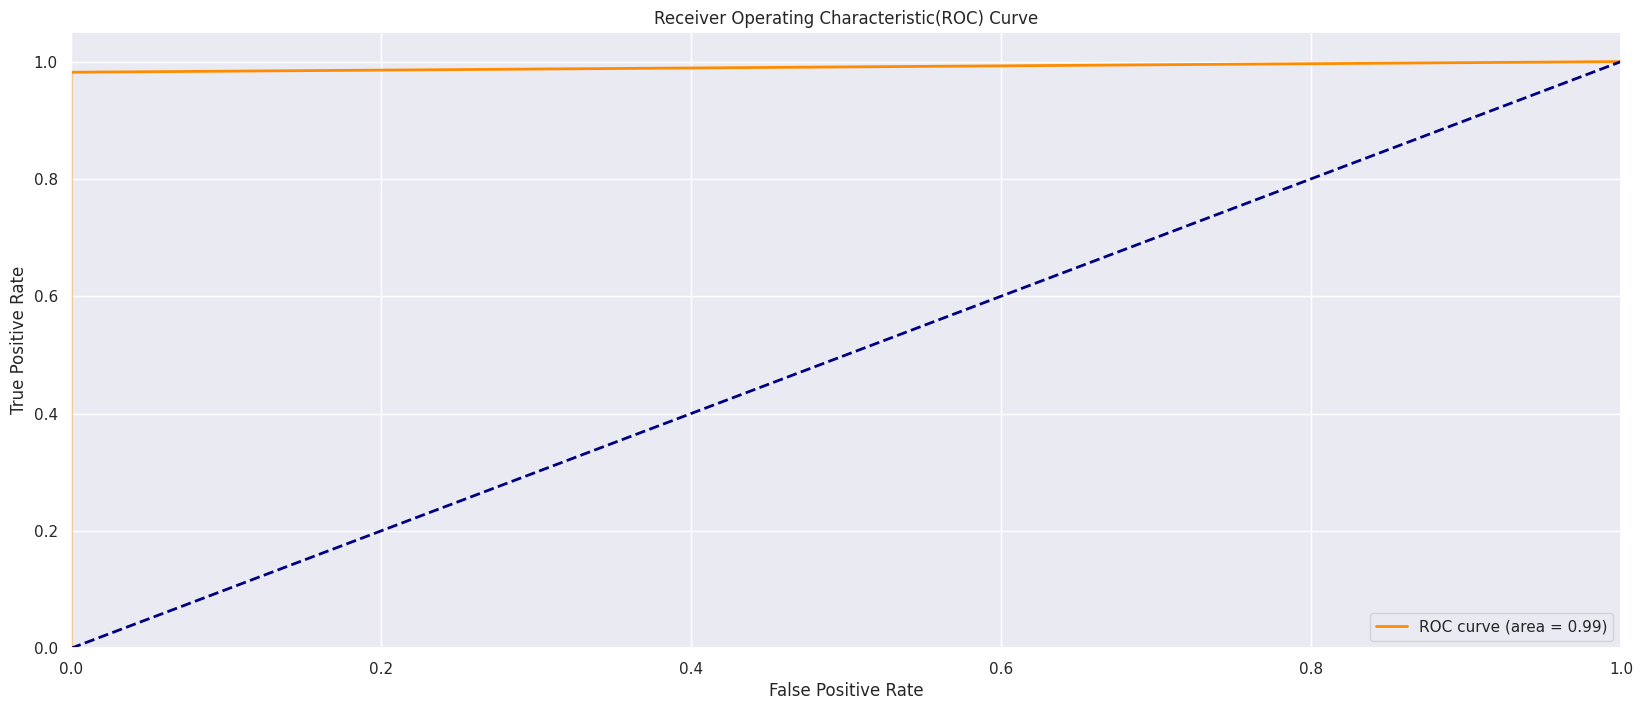

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Class1, y_predval)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##Summaries of the Models##
Here is the tabular representation of all the models and their metrics. This summary provides the opportunity to pick the best model at a glance via a table or a chart.

In [ ]:
import pandas as pd

# Results dictionary
Results = {
    'Model_Names': ['SVM', 'Random_Forest', 'Logistic_Regression' ],
    'Metrics_Name': ['Accuracies', 'Recalls', 'Precisions', 'F1Scores'],
    'Metrics_Values': [
        [0.83, 0.99, 0.77],
        [0.78, 0.99, 0.79],
        [0.83, 0.99, 0.77],
        [0.71, 0.99, 0.77]
    ]
}

# Create an empty DataFrame
df = pd.DataFrame()

# Add 'Model_Names' column
df['Model_Names'] = Results['Model_Names']

# Add metrics as columns
for i, metric_name in enumerate(Results['Metrics_Name']):
    df[metric_name] = Results['Metrics_Values'][i]

# Set 'Model_Names' as the index
df.set_index('Model_Names', inplace=True)

# Print the DataFrame
print(df)

                     Accuracies  Recalls  Precisions  F1Scores
Model_Names                                                   
SVM                        0.83     0.78        0.83      0.71
Random_Forest              0.99     0.99        0.99      0.99
Logistic_Regression        0.77     0.79        0.77      0.77


###Visualisation of the Model Metrics##

The model metrics is represented below:

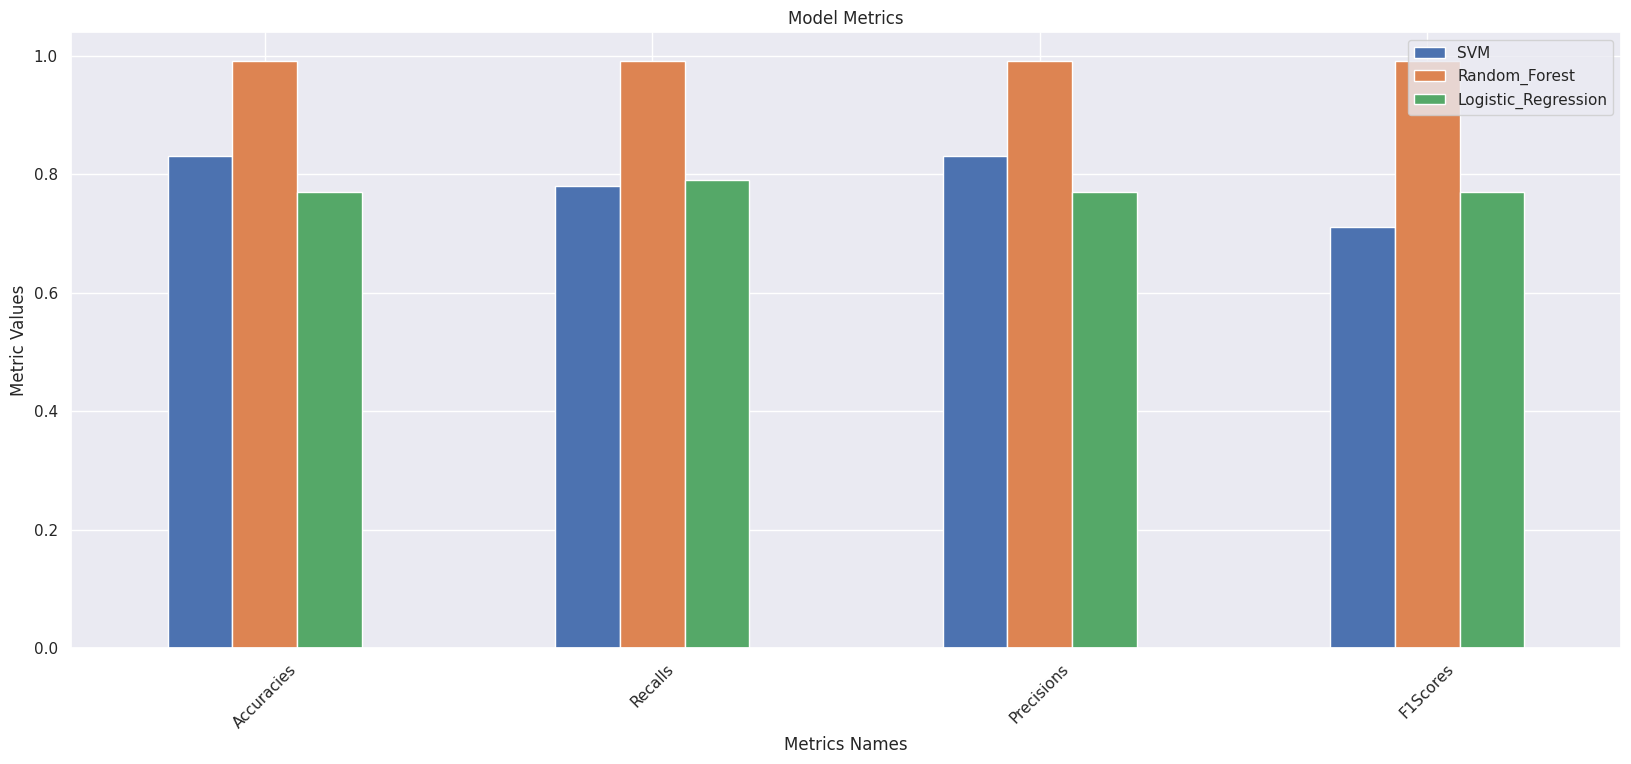

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("darkgrid")

# Transpose the DataFrame to have Model Names as columns
df_transposed = df.transpose()

# Plot the grouped bar chart
df_transposed.plot(kind='bar')

# Set the title and labels
plt.title('Model Metrics')
plt.xlabel('Metrics Names')
plt.ylabel('Metric Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.legend(loc='upper right')
plt.show()

##Conclusion##

The models in the above visuals are clear and it shows that the best model that is able to predict the attrition rate correctly is the Random Forest Model, It performs above 98% on the test data and the validation datasets. Deployment of the model as a web or mobile solution will reduce the attrition rate for this company in particular because the organisation will start to use the succession plans or look for a new employee even at the point of onboarding  if the model suggest that the employee will leave in no time.

People optimization team is able to plan the corporate objective around those with longer staying period.